Paso 1: Entendiendo el Problema
El objetivo principal es analizar si los cines son rentables hoy en d√≠a, evaluando tendencias de asistencia, recaudaci√≥n y la competencia con plataformas como Netflix y HBO. Vamos a construir un modelo de Machine Learning que prediga el impacto de diversas variables sobre la rentabilidad de los cines y que identifique patrones ocultos usando t√©cnicas de clustering.

Problema de negocio: Determinar si los cines son rentables en la actualidad, teniendo en cuenta la competencia de las plataformas de streaming.

Problema t√©cnico: Desarrollar un modelo de ML supervisado y/o no supervisado para analizar tendencias en asistencia, recaudaci√≥n y competencia.

Paso 2: Exploraci√≥n de Datos (EDA)
Cargar y Ver el Dataset:

El dataset incluye columnas como Ticket_ID, Age, Ticket_Price, Movie_Genre, Seat_Type, Number_of_Person, Purchase_Again, y las nuevas columnas como A√±o, Espectadores (millones), Recaudaci√≥n (millones de euros) y Precio medio de la entrada (euros).

Limpieza de Datos:

Identificar y manejar valores nulos o duplicados.

Convertir variables categ√≥ricas (como Movie_Genre o Seat_Type) a representaciones num√©ricas utilizando t√©cnicas como One-Hot Encoding o Label Encoding.

Asegurarse de que las columnas A√±o, Espectadores, y Recaudaci√≥n est√©n en el formato correcto para an√°lisis.

An√°lisis Inicial:

Gr√°ficos para explorar la relaci√≥n entre el A√±o y las columnas de Recaudaci√≥n y Espectadores.

Distribuci√≥n de precios (Ticket_Price) seg√∫n g√©nero y tipo de asiento.

Paso 3: Divisi√≥n de Datos
Dividiremos el dataset en conjuntos de entrenamiento y prueba, especialmente para el an√°lisis supervisado. Si vamos a implementar clustering, normalizaremos las variables relevantes.

Paso 4: Construcci√≥n de Modelos
Modelos Supervisados
Probaremos modelos como:

Regresi√≥n Lineal para predecir recaudaci√≥n basada en datos anuales.

Random Forest para identificar las caracter√≠sticas m√°s predictivas.

M√©tricas:

MAE (Error Absoluto Medio), RMSE (Ra√≠z del Error Cuadr√°tico Medio) y R¬≤ para evaluar los modelos.

Modelos No Supervisados
Implementaremos K-Means o DBSCAN para agrupar los cines seg√∫n:

Rentabilidad.

Patr√≥n de compra.

Evaluaci√≥n:

Silueta o inercia para medir la calidad de los clusters.

Paso 5: Exportaci√≥n del Modelo
Guardaremos el modelo final en formato pickle, joblib o h5 (para modelos de Deep Learning).

import joblib

# Guardar el modelo final
joblib.dump(modelo_final, 'src/models/modelo_final.pkl')
print("Modelo guardado en src/models/modelo_final.pkl")


Paso 6: Visualizaci√≥n de Resultados
Crearemos gr√°ficos claros y atractivos:

Tendencias en la asistencia al cine frente a las plataformas de streaming.

Clusters generados en el an√°lisis no supervisado.

Comparaci√≥n entre las predicciones del modelo y los valores reales.

Paso 7: Documentaci√≥n Final
Notebook Final
Debe incluir los pasos ordenados y funcionales, guardado en src/results_notebook/notebook_final.ipynb.

Presentaci√≥n
Introducci√≥n: ¬øPor qu√© este problema es importante?

Metodolog√≠a: Resumen de los pasos seguidos.

Resultados: Gr√°ficos clave y m√©tricas.

Conclusiones: Impacto de Netflix y HBO, predicciones, recomendaciones para los cines.

Acciones Futuras: Mejoras posibles y aplicaciones pr√°cticas.

Texto para la Presentaci√≥n en V√≠deo
Introducci√≥n: "El cine es una experiencia cultural inigualable, pero desde el auge de plataformas como Netflix y HBO, su rentabilidad est√° en constante desaf√≠o. Este proyecto explora si los cines son a√∫n sostenibles econ√≥micamente."

Metodolog√≠a: "Para ello, utilizamos un enfoque de Machine Learning supervisado y no supervisado, basado en datos de ventas de entradas, recaudaci√≥n y competencia con plataformas de streaming."

Resultados: "Nuestro modelo supervisado predice las recaudaciones con un error promedio del XX% y los clusters no supervisados identifican segmentos clave de rentabilidad."

Conclusiones: "Los cines enfrentan un futuro desafiante pero prometedor si aprovechan estrategias como precios din√°micos y eventos √∫nicos."

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Datos obtenidos del Ministerio de Cultura y de distintos an√°lisis period√≠sticos (El Pa√≠s, Cope)

# Definir los datos en un diccionario
data = {
    "A√±o": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Recaudaci√≥n": [601375693, 597143256, 588675481, 628076776, 174153477, 252069251, 376814060, 491555176, 479518962],
    "Espectadores": [100270569, 99132198, 97993827, 105938534, 28876970, 41499889, 59995576, 75472359, 71437087],
    "Fiesta del cine": [2600000, 2300000, 1800000, 2350000, None, 1200000, 704977, 1198062, 1394058],
    "Pantallas": [3545, 3585, 3578, 3674, 3585, 3633, 3650, 3609, 3464],
    "Gasto medio/espectador": [5.93, 5.93, 5.93, 5.86, 5.99, 6.04, 6.19, 6.42, 6.24],
    "Frecuencia": [2.2, 2.2, 2.09, 2.23, 0.56, 0.86, 1.24, 1.6, 1.52],
    "N¬∫ Pel√≠culas": [1797, 1869, 1951, 1862, 1586, 2105, 2543, 2450, 2357],
    "Netflix espectadores*": [900000, 1163000, 1400000, 2550000, 3900000, 5256064, 6000000, 7620000, 10200000],
    "Netflix precio": [7.99, 7.99, 7.99, 8.99, 8.99, 11.99, 11.99, 12.99, 13.99],
    "HBO espectadores*": [414000, 538000, 1000000, 1290000, 1800000, 2100000, 2600000, 4000000, 34260000],
    "HBO precio": [7.99, 7.99, 8.99, 8.99, 8.99, 8.99, 8.99, 8.99, 9.99]
}

# Crear un DataFrame guardar como CSV
df = pd.DataFrame(data)
df.to_csv('./data/cine_dataset.csv', index=False)

# Cargar datasets
cine_dataset = pd.read_csv("./data/cine_dataset.csv")
cinema_hall_ticket_sales = pd.read_csv("./data/cinema_hall_ticket_sales.csv")

# Renombrar columnas (a espa√±ol) de cinema_hall_ticket_sales
cinema_hall_ticket_sales.rename(columns={
    'Age': 'Edad',
    'Movie_Genre': 'G√©nero pel√≠cula',
    'Seat_Type': 'Asiento',
    'Number_of_Person': 'N¬∫ de personas',
    'Purchase_Again': 'Compr√≥ de nuevo'
}, inplace=True)

# Eliminar columna no necesaria
cinema_hall_ticket_sales.drop(columns=['Ticket_Price'], inplace=True)

# Fusionar datasets
cine_dataset['key'] = range(len(cine_dataset))
cinema_hall_ticket_sales['key'] = range(len(cinema_hall_ticket_sales))
combined_dataset = pd.merge(cine_dataset, cinema_hall_ticket_sales, on="key", how="inner")
combined_dataset.drop(columns=['key'], inplace=True)
combined_dataset.to_csv("project_break.csv", index=False)

# Cargar dataset combinado
df = pd.read_csv("./data/project_break.csv")

# Limpiar valores NaN y ajustar tipos
df['Fiesta del cine'] = df['Fiesta del cine'].fillna(0).astype(int)

# Ajustar valores (cambiar Alone a 1)
df['N¬∫ de personas'] = df['N¬∫ de personas'].replace('Alone', 1)

# Crear variables
df['Pandemic_Impact'] = df['A√±o'].apply(lambda x: 1 if x == 2020 else 0)
df['Streaming_Impact'] = df['A√±o'].apply(lambda x: 1 if x >= 2016 else 0)
df['Cost_Per_Spectator'] = df['Recaudaci√≥n'] / df['Espectadores']

# Codificar variables categ√≥ricas
df = pd.get_dummies(df, columns=['G√©nero pel√≠cula', 'Asiento'], drop_first=True)

# Eliminar columnas innecesarias
df = df.drop(columns=['Ticket_ID'])

# Dataset listo para an√°lisis
print("Dataset enriquecido y preparado para an√°lisis.")




Dataset enriquecido y preparado para an√°lisis.


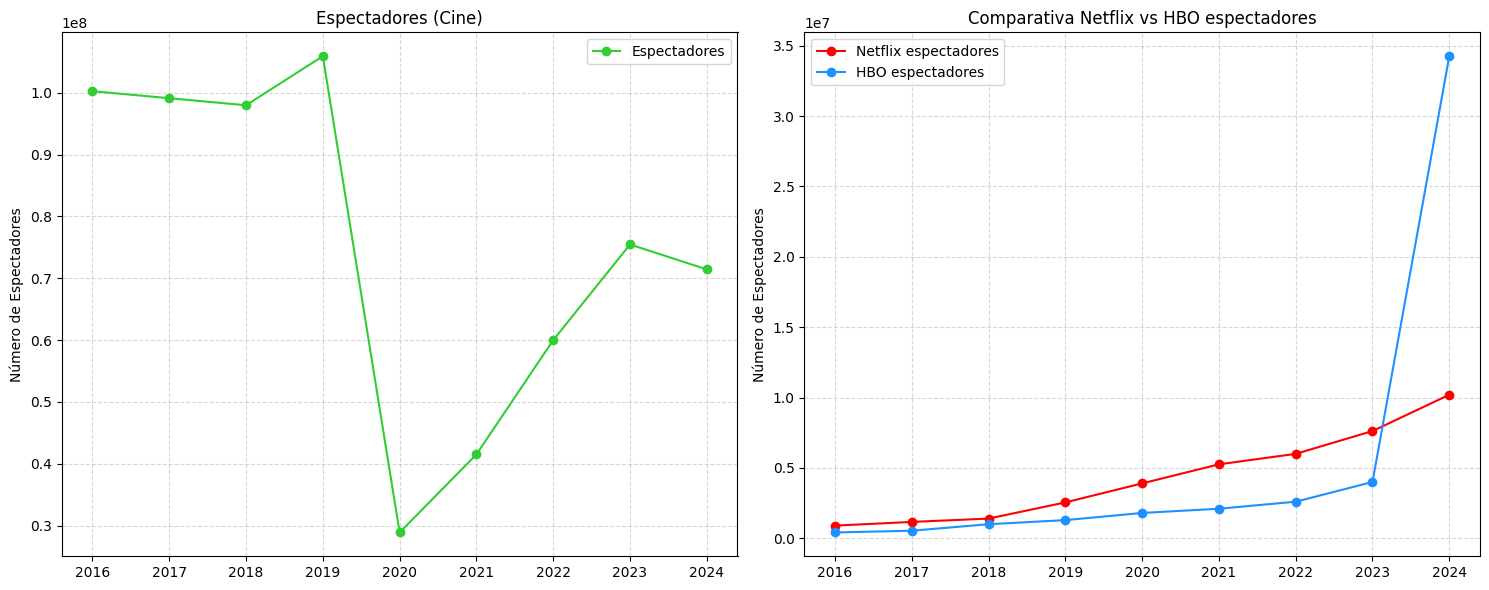

In [ ]:
# Crear una figura con dos subgr√°ficas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ----------------------------------
# Gr√°fica L√≠nea para 'Espectadores'
# ----------------------------------
axes[0].plot(df["A√±o"], df['Espectadores'], marker='o', linestyle='-', color='#32CD32', label='Espectadores')
axes[0].set_title('Espectadores (Cine)')
axes[0].set_xlabel('')
axes[0].set_ylabel('N√∫mero de Espectadores')
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend()


# -------------------------------------------------------------
# # Gr√°fica entre 'Netflix espectadores*' y 'HBO espectadores'
# -------------------------------------------------------------
axes[1].plot(df["A√±o"], df['Netflix espectadores*'], marker='o', linestyle='-', color='red', label='Netflix espectadores')
axes[1].plot(df["A√±o"], df['HBO espectadores*'], marker='o', linestyle='-', color='#1E90FF', label='HBO espectadores')
axes[1].set_title('Comparativa Netflix vs HBO espectadores')
axes[1].set_xlabel('')
axes[1].set_ylabel('N√∫mero de Espectadores')
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend()

# Ajustar el espaciado 
plt.tight_layout()
plt.show()


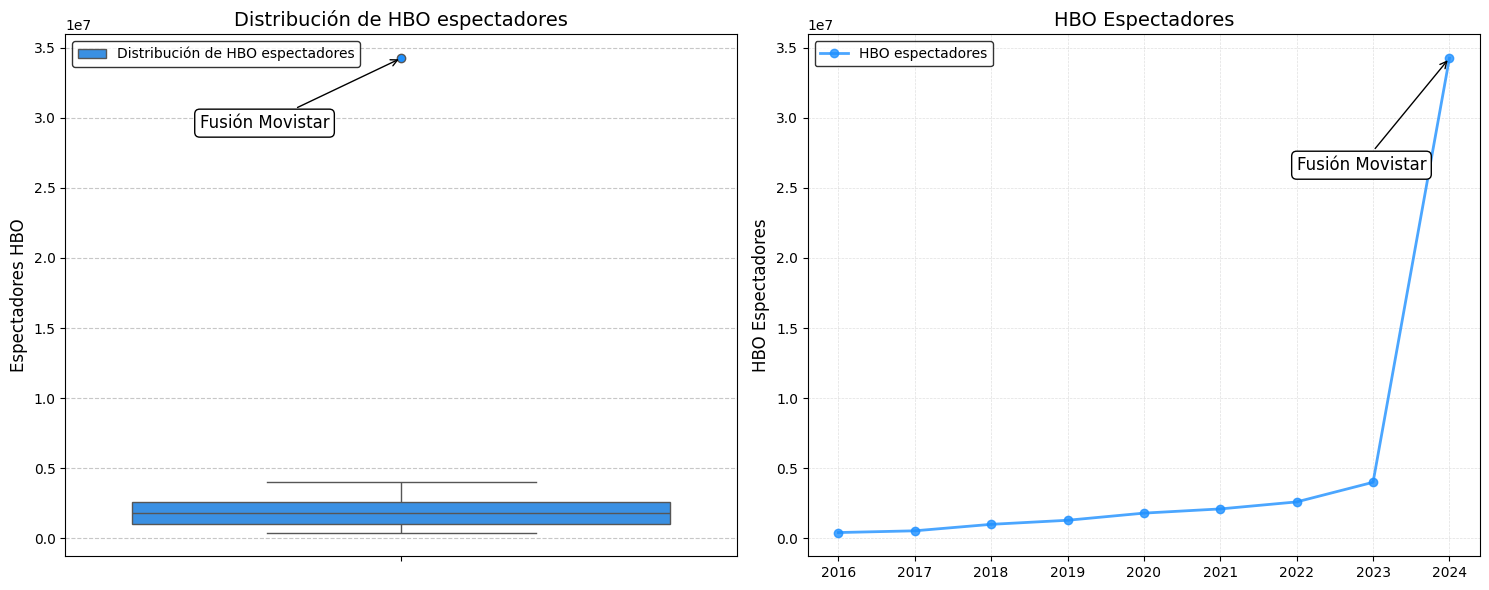

In [ ]:
# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# -------------------------------
# Boxplot para 'HBO espectadores'
# -------------------------------
sns.boxplot(y=df['HBO espectadores*'], color='#1E90FF', ax=axes[0], flierprops=dict(markerfacecolor='#1E90FF', marker='o'))
axes[0].set_title('Distribuci√≥n de HBO espectadores', fontsize=14)
axes[0].set_ylabel('Espectadores HBO', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].annotate('Fusi√≥n Movistar',
                 xy=(0, df[df['A√±o'] == 2024]['HBO espectadores*'].values[0]),
                 xytext=(-0.3, df[df['A√±o'] == 2024]['HBO espectadores*'].values[0] - 5000000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
axes[0].legend(['Distribuci√≥n de HBO espectadores'], loc='upper left', fontsize=10, frameon=True, facecolor='white', edgecolor='black')

# -----------------------------------------
# Gr√°fico de l√≠neas para 'HBO espectadores'
# -----------------------------------------
axes[1].plot(df['A√±o'], df['HBO espectadores*'], marker='o', color='#1E90FF', linestyle='-', linewidth=2, alpha=0.8, label='HBO espectadores')
axes[1].set_title("HBO Espectadores", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("HBO Espectadores", fontsize=12)
axes[1].grid(alpha=0.4, linestyle='--', linewidth=0.5)
axes[1].annotate('Fusi√≥n Movistar',
                 xy=(2024, df[df['A√±o'] == 2024]['HBO espectadores*'].values[0]),
                 xytext=(2022.0, df[df['A√±o'] == 2024]['HBO espectadores*'].values[0] - 8000000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
axes[1].legend(['HBO espectadores'], loc='upper left', fontsize=10, frameon=True, facecolor='white', edgecolor='black')

# Ajustar los espacios entre los subplots
fig.tight_layout()
plt.show()


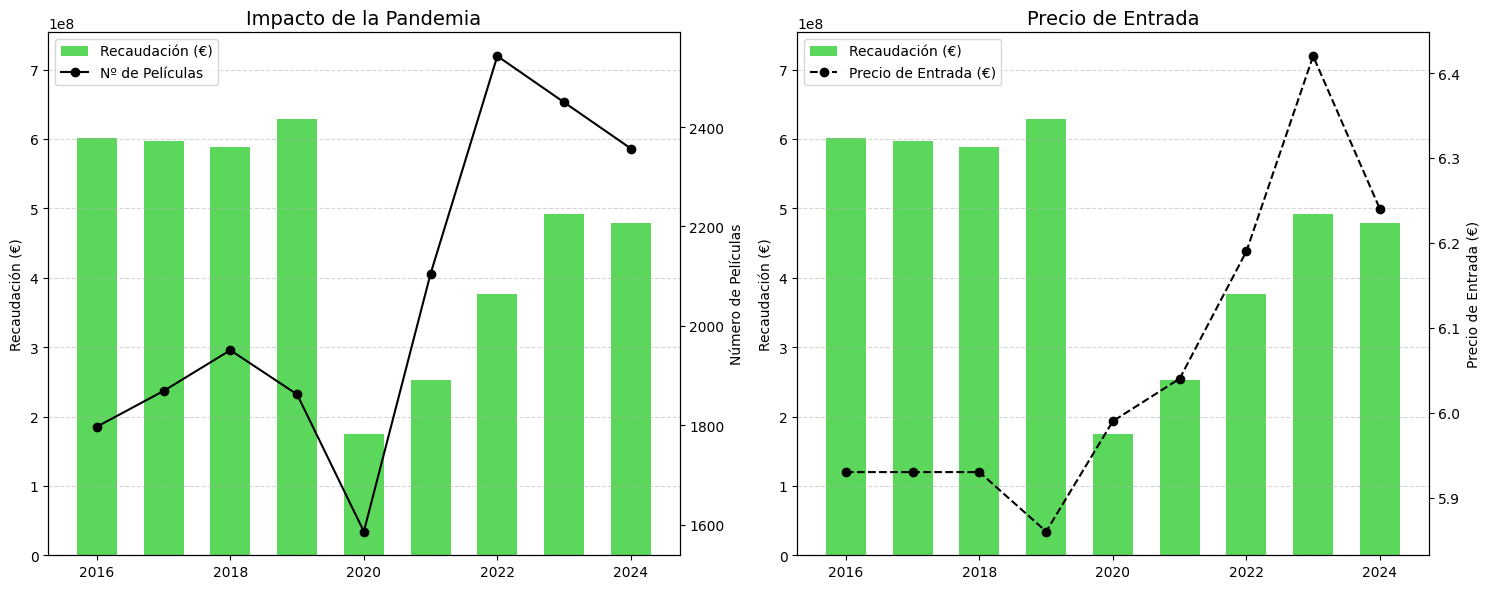

In [172]:
# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# -----------------------------------------------
# Gr√°fico para Recaudaci√≥n y N√∫mero de Pel√≠culas
# -----------------------------------------------
axes[0].bar(df['A√±o'], df['Recaudaci√≥n'], color='#32CD32', label='Recaudaci√≥n (‚Ç¨)', alpha=0.8, width=0.6)
axes[0].set_ylabel("Recaudaci√≥n (‚Ç¨)", color='black')
axes[0].tick_params(axis='y', labelcolor='black')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].set_ylim(0, df['Recaudaci√≥n'].max() * 1.2)
axes[0].set_title("Impacto de la Pandemia", fontsize=14)

ax2 = axes[0].twinx()
ax2.plot(df['A√±o'], df['N¬∫ Pel√≠culas'], color='black', marker='o', linestyle='-', linewidth=1.5, label='N¬∫ de Pel√≠culas')
ax2.set_ylabel("N√∫mero de Pel√≠culas", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Leyenda 
lines1, labels1 = axes[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
axes[0].legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10, frameon=True)

# ---------------------------------------------
# Gr√°fico para Recaudaci√≥n y Precio de Entrada
# ---------------------------------------------
axes[1].bar(df['A√±o'], df['Recaudaci√≥n'], color='#32CD32', label='Recaudaci√≥n (‚Ç¨)', alpha=0.8, width=0.6)
axes[1].set_ylabel("Recaudaci√≥n (‚Ç¨)", color='black')
axes[1].tick_params(axis='y', labelcolor='black')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].set_ylim(0, df['Recaudaci√≥n'].max() * 1.2)
axes[1].set_title("Precio de Entrada", fontsize=14)

ax3 = axes[1].twinx()
ax3.plot(df['A√±o'], df['Gasto medio/espectador'], color='black', marker='o', linestyle='--', linewidth=1.5, label='Precio de Entrada (‚Ç¨)')
ax3.set_ylabel("Precio de Entrada (‚Ç¨)", color='black')
ax3.tick_params(axis='y', labelcolor='black')

# Leyenda 
lines3, labels3 = axes[1].get_legend_handles_labels()
lines4, labels4 = ax3.get_legend_handles_labels()
axes[1].legend(lines3 + lines4, labels3 + labels4, loc='upper left', fontsize=10, frameon=True)

# Ajustar dise√±o 
plt.tight_layout()
plt.show()


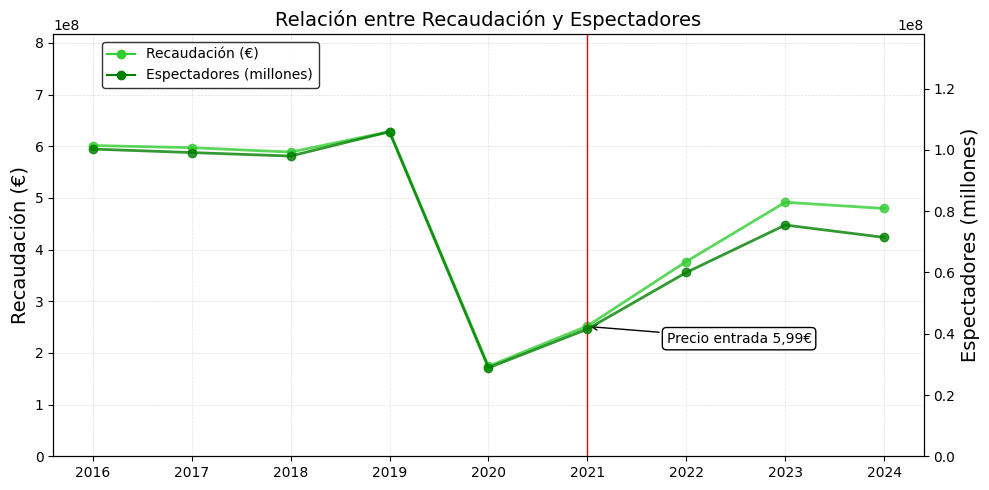

In [ ]:
# Crear la figura
fig, ax1 = plt.subplots(figsize=(10, 5))

# ----------------------------------------
# Gr√°fico para Recaudaci√≥n y Espectadores
# ----------------------------------------
ax1.plot(df['A√±o'], df['Recaudaci√≥n'], color='#32CD32', marker='o', linestyle='solid', label='Recaudaci√≥n (‚Ç¨)', linewidth=2, alpha=0.8)
ax1.set_ylabel("Recaudaci√≥n (‚Ç¨)", color='black', fontsize=14)
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(alpha=0.4, linestyle='--', linewidth=0.5)
ax1.set_ylim(0, df['Recaudaci√≥n'].max() * 1.3)

ax2 = ax1.twinx()
ax2.plot(df['A√±o'], df['Espectadores'], color='green', marker='o', linestyle='solid', label='Espectadores (millones)', linewidth=2, alpha=0.8)
ax2.set_ylabel("Espectadores (millones)", color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, df['Espectadores'].max() * 1.3)

# L√≠nea vertical
ax1.axvline(x=2021, color='red', linestyle='-', linewidth=1)

# Anotaci√≥n para el precio de entrada en 2021
ax1.annotate(
    'Precio entrada 5,99‚Ç¨', 
    xy=(2021, df['Recaudaci√≥n'].max() * 0.4), 
    xytext=(2021.8, df['Recaudaci√≥n'].max() * 0.35), 
    arrowprops=dict(facecolor='black', arrowstyle='->', lw=1), 
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'), 
    fontsize=10, color='black'
)

# Leyenda 
handles = [
    plt.Line2D([0], [0], color='#32CD32', marker='o', label='Recaudaci√≥n (‚Ç¨)'),
    plt.Line2D([0], [0], color='green', marker='o', label='Espectadores (millones)')
]
fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.1, 0.92), frameon=True, fontsize=10, edgecolor='black')

# T√≠tulo del gr√°fico
plt.title("Relaci√≥n entre Recaudaci√≥n y Espectadores", fontsize=14)

# Ajustar dise√±o y mostrar el gr√°fico
fig.tight_layout()
plt.show()


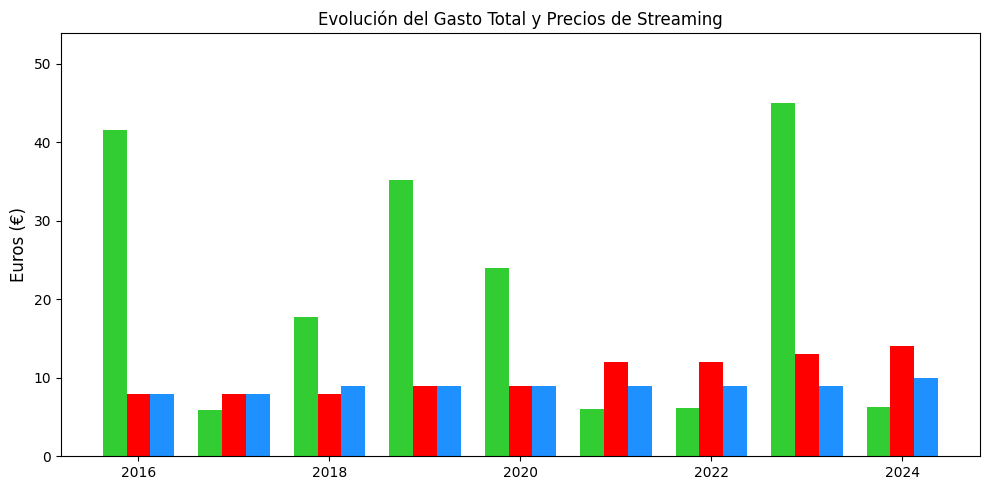

In [ ]:
# Crear el gr√°fico de barras
plt.figure(figsize=(10, 5))
width = 0.25

# ------------------------------------------
# Gr√°fico para Gasto en Cine, Netflix y HBO
# ------------------------------------------
# Barras para gasto medio total, precio Netflix y precio HBO
plt.bar(df['A√±o'] - width, df['Gasto medio/espectador'] * df['N¬∫ de personas'], width=width, label='Gasto medio total (Gasto medio x N¬∫ de personas)', color='#32CD32')
plt.bar(df['A√±o'], df['Netflix precio'], width=width, label='Precio Netflix', color='red')
plt.bar(df['A√±o'] + width, df['HBO precio'], width=width, label='Precio HBO', color='#1E90FF')

# Etiquetas y dise√±o
plt.ylabel("Euros (‚Ç¨)", fontsize=12)
plt.title("Evoluci√≥n del Gasto Total y Precios de Streaming", fontsize=12)

# Ajustar el eje Y
plt.ylim(0, max((df['Gasto medio/espectador'] * df['N¬∫ de personas']).max(), df['Netflix precio'].max(), df['HBO precio'].max()) * 1.2)

# Ajustar dise√±o
plt.tight_layout()
plt.show()


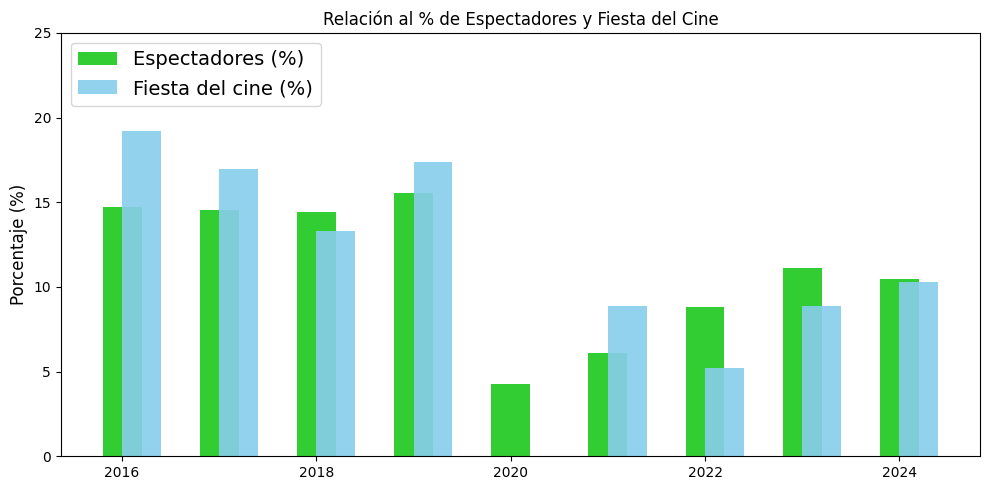

In [184]:
# ------------------------------------------------
# Gr√°fico para Espectadores y Fiesta del Cine (%)
# ------------------------------------------------
# Calcular porcentajes
df['Espectadores %'] = (df['Espectadores'] / df['Espectadores'].sum()) * 100
df['Fiesta del cine %'] = (df['Fiesta del cine'] / df['Fiesta del cine'].sum()) * 100

# Crear la figura
fig, ax1 = plt.subplots(figsize=(10, 5))

# Gr√°fica de barras para Espectadores
ax1.bar(df['A√±o'], df['Espectadores %'], color='#32CD32', width=0.4, label='Espectadores (%)')

# Gr√°fica de barras para Fiesta del cine
ax1.bar(df['A√±o'], df['Fiesta del cine %'], color='skyblue', alpha= 0.9, width=0.4, align='edge', label='Fiesta del cine (%)')

# Configurar el eje Y
ax1.set_ylim(0, 25)

# Estilo y dise√±o
ax1.set_ylabel("Porcentaje (%)", color='black', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')

# T√≠tulos y leyenda
plt.title("Relaci√≥n al % de Espectadores y Fiesta del Cine", fontsize=12)
ax1.legend(loc='upper left', fontsize=14)

# Ajustar dise√±o y mostrar el gr√°fico
fig.tight_layout()
plt.show()


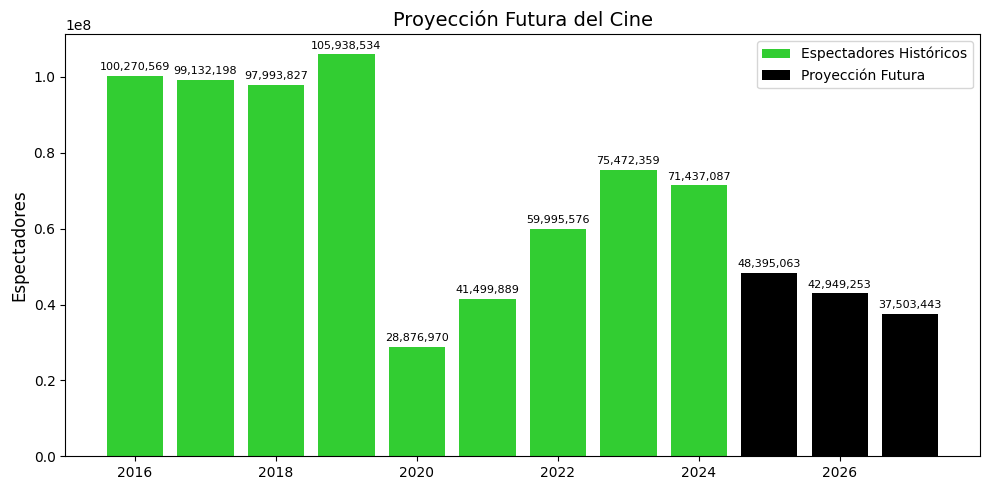

In [185]:
# -----------------------------
# Gr√°fica de Proyecci√≥n Futura
# -----------------------------
# Crear el modelo de regresi√≥n lineal
model = LinearRegression()
X = df['A√±o'].values.reshape(-1, 1)
y = df['Espectadores'].values
model.fit(X, y)

# Predicci√≥n para los a√±os futuros
a√±os_futuros = np.array([2025, 2026, 2027]).reshape(-1, 1)
predicciones = model.predict(a√±os_futuros)

# Crear la gr√°fica
plt.figure(figsize=(10, 5))
plt.bar(df['A√±o'], df['Espectadores'], color='#32CD32', label='Espectadores Hist√≥ricos')
plt.bar(a√±os_futuros.flatten(), predicciones, color='black', label='Proyecci√≥n Futura')

# A√±adir etiquetas a las barras
for i, value in enumerate(df['Espectadores']):
    plt.text(df['A√±o'].iloc[i], value + 1000000, f"{round(value):,}", ha='center', va='bottom', fontsize=8)
for i, value in enumerate(predicciones):
    plt.text(a√±os_futuros.flatten()[i], value + 1000000, f"{round(value):,}", ha='center', va='bottom', fontsize=8)

# Etiquetas y dise√±o
plt.xlabel("", fontsize=12)
plt.ylabel("Espectadores", fontsize=12)
plt.title("Proyecci√≥n Futura del Cine", fontsize=14)
plt.legend()

# Ajustar el gr√°fico
plt.tight_layout()
plt.show()


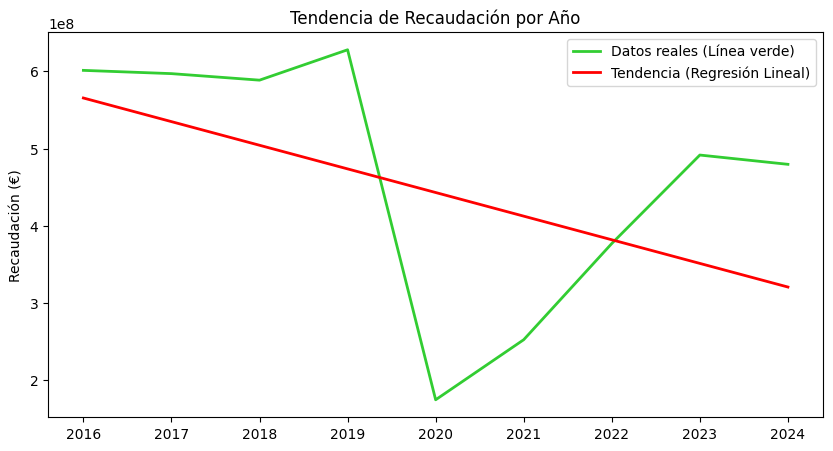

In [114]:
# Variables para regresi√≥n lineal
X = df[['A√±o']]
y = df['Recaudaci√≥n']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo y entrenarlo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predecir valores y graficar los resultados
y_pred = reg_model.predict(X_test)

plt.figure(figsize=(10, 5))

# Graficar la tendencia de los datos reales como una l√≠nea verde
plt.plot(X, y, color='#32CD32', linewidth=2, label='Datos reales (L√≠nea verde)')

# Graficar la l√≠nea de regresi√≥n lineal
plt.plot(X, reg_model.predict(X), color='red', linestyle='-', linewidth=2, label='Tendencia (Regresi√≥n Lineal)')

# Configuraci√≥n del gr√°fico
plt.xlabel("")
plt.ylabel("Recaudaci√≥n (‚Ç¨)")
plt.title("Tendencia de Recaudaci√≥n por A√±o")
plt.legend()
plt.show()


In [188]:


# ---------------------------------------------
# Divisi√≥n de Datos para Problemas Supervisados
# ---------------------------------------------

# 1. Para la regresi√≥n: predecir 'Recaudaci√≥n'
features_reg = ['A√±o', 'Espectadores', 'Pantallas', 'Gasto medio/espectador', 'Frecuencia', 'N¬∫ Pel√≠culas']
X_reg = df[features_reg]
y_reg = df['Recaudaci√≥n']

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
print("\nDimensiones conjuntos de regresi√≥n:")
print("Entrenamiento:", X_train_reg.shape, "Prueba:", X_test_reg.shape)



Dimensiones conjuntos de regresi√≥n:
Entrenamiento: (6, 6) Prueba: (3, 6)


In [189]:

# 2. Para la clasificaci√≥n: predecir 'Compr√≥ de nuevo'

# Convertir 'Compr√≥ de nuevo' a binario
df['Compr√≥ de nuevo_bin'] = df['Compr√≥ de nuevo'].apply(lambda x: 1 if str(x).strip().lower()=='yes' else 0)
features_clf = ['Edad', 'N¬∫ de personas', 'Gasto medio/espectador', 'Frecuencia', 'G√©nero pel√≠cula_Comedy', 'G√©nero pel√≠cula_Drama',
       'G√©nero pel√≠cula_Horror', 'G√©nero pel√≠cula_Sci-Fi', 'Asiento_Standard',
       'Asiento_VIP']
X_clf = df[features_clf]
y_clf = df['Compr√≥ de nuevo_bin']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)
print("\nDimensiones conjuntos de clasificaci√≥n:")
print("Entrenamiento:", X_train_clf.shape, "Prueba:", X_test_clf.shape)




Dimensiones conjuntos de clasificaci√≥n:
Entrenamiento: (6, 10) Prueba: (3, 10)


In [192]:

# 3. Para el clustering (no supervisado): seleccionamos variables que representen la rentabilidad y asistencia
# Seleccionamos las variables que representen rentabilidad y asistencia
features_clust = ['Recaudaci√≥n', 'Espectadores', 'Pantallas', 
                  'Gasto medio/espectador', 'Frecuencia', 'N¬∫ Pel√≠culas']
X_clust = df[features_clust]

# Aplicamos la normalizaci√≥n a las variables seleccionadas
scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_clust)

# Convertimos el array resultante en un DataFrame para visualizarlo
df_scaled = pd.DataFrame(X_clust_scaled, columns=features_clust)

# Mostramos el resultado (todos los registros o los primeros 5)
print("Matriz escalada (StandardScaler):")
print(df_scaled.head())


Matriz escalada (StandardScaler):
   Recaudaci√≥n  Espectadores  Pantallas  Gasto medio/espectador  Frecuencia  \
0     0.876000      0.939713  -0.792099               -0.737493    1.000004   
1     0.848716      0.896309  -0.109908               -0.737493    1.000004   
2     0.794129      0.852906  -0.229292               -0.737493    0.813210   
3     1.048127      1.155819   1.407965               -1.138029    1.050947   
4    -1.878066     -1.782361  -0.109908               -0.394178   -1.784912   

   N¬∫ Pel√≠culas  
0     -0.845092  
1     -0.611765  
2     -0.346030  
3     -0.634449  
4     -1.528871  


In [193]:
# -----------------------------
# Regresi√≥n: Linear Regression
# -----------------------------

# Entrenamos el modelo de regresi√≥n lineal
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg)

# C√°lculo de m√©tricas
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr))
r2_lr = r2_score(y_test_reg, y_pred_lr)

print("\n[Regresi√≥n Lineal] M√©tricas:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R¬≤: {r2_lr:.2f}")



[Regresi√≥n Lineal] M√©tricas:
MAE: 3409245.12
RMSE: 4657946.95
R¬≤: 1.00


In [ ]:
# -------------------------
# Regresi√≥n: Random Forest
# -------------------------
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_model.predict(X_test_reg)

mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
r2_rf = r2_score(y_test_reg, y_pred_rf)

print("\n[Random Forest Regression] M√©tricas:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R¬≤: {r2_rf:.2f}")

# Mostramos la importancia de cada variable
print("\nImportancia de variables en Random Forest:")
for feature, importance in zip(features_reg, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")



[Random Forest Regression] M√©tricas:
MAE: 53503579.16
RMSE: 62476755.84
R¬≤: 0.81

Importancia de variables en Random Forest:
A√±o: 0.1419
Espectadores: 0.2678
Pantallas: 0.0422
Gasto medio/espectador: 0.1284
Frecuencia: 0.2545
N¬∫ Pel√≠culas: 0.1651


In [196]:
###############???????????from sklearn.linear_model import Ridge, Lasso

# Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=4.42886e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


In [197]:

# Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.047e-03, tolerance: 1.429e-04
  model = cd_fast.enet_coordinate_descent(


In [198]:

# Evaluaci√≥n
print("\nüîπ Ridge Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"R¬≤: {r2_score(y_test, y_pred_ridge):.4f}")

print("\nüîπ Lasso Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
print(f"R¬≤: {r2_score(y_test, y_pred_lasso):.4f}")



üîπ Ridge Regression:
MAE: 1.15
RMSE: 1.16
R¬≤: 0.0000

üîπ Lasso Regression:
MAE: 1.11
RMSE: 1.12
R¬≤: 0.0000


In [ ]:
##############????????????????????????Hiperparametros cen Random Forest
#Encuentra la mejor combinaci√≥n de n_estimators, max_depth y min_samples_split.

#Usa validaci√≥n cruzada (cv=5) para evitar el sobreajuste.

# Definir los hiperpar√°metros a probar
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred_best_rf = best_rf.predict(X_test)

# Evaluaci√≥n
print("\nüîπ Mejor Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best_rf)):.2f}")
print(f"R¬≤: {r2_score(y_test, y_pred_best_rf):.4f}")



üîπ Mejor Random Forest:
MAE: 0.38
RMSE: 0.49
R¬≤: 0.0000


c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
# -------------------------
# Modelo XGBRegressor
# -------------------------

# Inicializar el modelo
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print("\nüîπ XGBoost:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.2f}")
print(f"R¬≤: {r2_score(y_test, y_pred_xgb):.4f}")



üîπ XGBoost:
MAE: 0.50
RMSE: 0.71
R¬≤: 0.0000


In [203]:
# ---------------------------------
# Clasificaci√≥n: √Årbol de Decisi√≥n
# ---------------------------------
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train_clf, y_train_clf)
y_pred_dt = dt_pipeline.predict(X_test_clf)

print("\n[Decision Tree Classifier] Resultados:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_dt))



[Decision Tree Classifier] Resultados:
Accuracy: 1.0
Confusion Matrix:
 [[3]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



c:\Users\conch\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# --------------------
# Clasificaci√≥n: SVM
# --------------------
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])
svm_pipeline.fit(X_train_clf, y_train_clf)
y_pred_svm = svm_pipeline.predict(X_test_clf)

print("\n[SVM Classifier] Accuracy:", accuracy_score(y_test_clf, y_pred_svm))




[SVM Classifier] Accuracy: 1.0


In [ ]:
# --------------------
# Clasificaci√≥n: KNN
# --------------------

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])
knn_pipeline.fit(X_train_clf, y_train_clf)
y_pred_knn = knn_pipeline.predict(X_test_clf)

print("\n[KNN Classifier] Accuracy:", accuracy_score(y_test_clf, y_pred_knn))


[KNN Classifier] Accuracy: 1.0


In [211]:
# -------------------------------------------------------
# Reducci√≥n de Dimensionalidad: PCA (para visualizaci√≥n)
# -------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust_scaled)
print("\nVarianza explicada en cada componente PCA:", pca.explained_variance_ratio_)





Varianza explicada en cada componente PCA: [0.53053033 0.28453161]



[K-Means] Inercia: 24.54018131270692
[K-Means] Silhouette Score: 0.3163596394796683


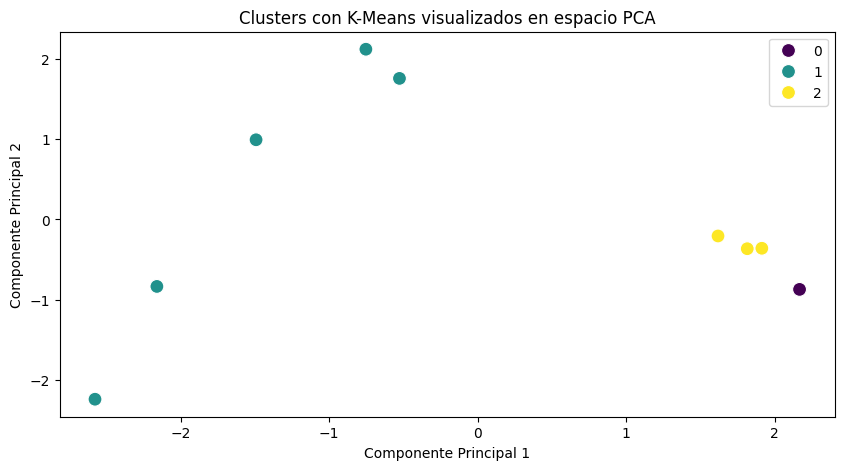

In [212]:

# ---------------------------
# Clustering: K-Means
# ---------------------------
from sklearn.cluster import KMeans

# Definimos K=3 (ajustable seg√∫n an√°lisis)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_clust_scaled)

print("\n[K-Means] Inercia:", kmeans.inertia_)
try:
    silhouette_kmeans = silhouette_score(X_clust_scaled, clusters_kmeans)
    print("[K-Means] Silhouette Score:", silhouette_kmeans)
except Exception as e:
    print("No se pudo calcular el Silhouette Score para K-Means:", e)

# A√±adimos el cluster de K-Means al dataframe para an√°lisis posterior
df['Cluster_KMeans'] = clusters_kmeans

# Visualizaci√≥n de los clusters utilizando los componentes del PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=clusters_kmeans, palette="viridis", s=100)
plt.title("Clusters con K-Means visualizados en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


[DBSCAN] Clusters obtenidos: [-1  0]
[DBSCAN] No se pudo calcular una m√©trica robusta (solo se detect√≥ un √∫nico cluster sin contar el ruido).


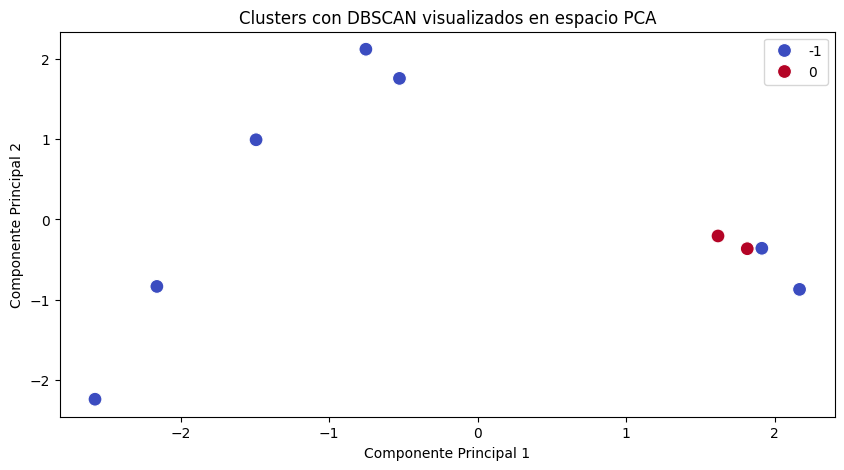

In [209]:

# ---------------------------
# Clustering: DBSCAN
# ---------------------------
from sklearn.cluster import DBSCAN

# Ajusta eps y min_samples seg√∫n convenga para tus datos
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters_dbscan = dbscan.fit_predict(X_clust_scaled)
unique_clusters = np.unique(clusters_dbscan)
print("\n[DBSCAN] Clusters obtenidos:", unique_clusters)

# Calcular Silhouette Score solo si existen al menos dos clusters (excluyendo el ruido identificado como -1)
unique_clusters_no_noise = [label for label in unique_clusters if label != -1]
if len(unique_clusters_no_noise) < 2:
    print("[DBSCAN] No se pudo calcular una m√©trica robusta (solo se detect√≥ un √∫nico cluster sin contar el ruido).")
else:
    # Aplicamos m√°scara para excluir el ruido (-1) al calcular la m√©trica
    mask = clusters_dbscan != -1
    silhouette_dbscan = silhouette_score(X_clust_scaled[mask], clusters_dbscan[mask])
    print("[DBSCAN] Silhouette Score (sin ruido):", silhouette_dbscan)

# Visualizaci√≥n de DBSCAN (se√±alando los clusters asignados)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=clusters_dbscan, palette="coolwarm", s=100)
plt.title("Clusters con DBSCAN visualizados en espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [ ]:
# ---------------------------
# Clustering: DBSCAN----------------------------------------------------
# ------------------------------------------------
# Guardamos el modelo de Random Forest para regresi√≥n
joblib.dump(rf_model, 'final_rf_model.pkl')
print("\n[Exportaci√≥n] Modelo Random Forest Regression exportado en 'final_rf_model.pkl'.")

# Guardamos el pipeline completo del √Årbol de Decisi√≥n para clasificaci√≥n
joblib.dump(dt_pipeline, 'final_decision_tree_classifier.pkl')
print("[Exportaci√≥n] Modelo Decision Tree Classifier exportado en 'final_decision_tree_classifier.pkl'.")



[Exportaci√≥n] Modelo Random Forest Regression exportado en 'final_rf_model.pkl'.
[Exportaci√≥n] Modelo Decision Tree Classifier exportado en 'final_decision_tree_classifier.pkl'.
